# Programming Assignment #3

<font color="red"> <b> Due: May 9  EOD</b> </font>

<font color="blue"> type your name here </font>

# I. Introduction

Describe the objective of this assignment. You can briefly state how you accompilsh it.

# II. Data

You may choose one of the following three datasets to work on. Introduce your data and visualize them. Describe your observations about the data. 
1. https://archive.ics.uci.edu/ml/datasets/covertype
2. https://archive.ics.uci.edu/ml/datasets/cnae-9
3. https://archive.ics.uci.edu/ml/datasets/Activity+recognition+using+wearable+physiological+measurements (DL Link - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6960825/bin/sensors-19-05524-s001.zip )


# III. Method

In the earlier assignment you had to implement Least Mean Square Classifier, Fisher Linear Discriminant, Perceptron,logistic regression, and Neural Network. In this assignment your tasks are the followings:

1. Implement both SVM and Kernel SVM and report the classification performance of the classifiers on the original dataset.
2. Use PCA to reduce the feature representation to a more compact version that may be of size: 10%, 15%, 20%, 25%, and 30% of the originial dataset dimension.
3. Compare the performance of the classifier using the PCA reduced descriptor and the original feature descriptor.

Do not forget to explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 

Each implementation will be followed by a separate markdown cell that should include
 - your implementation description
 - Review of the classification model implemented.
 - Plots or metrics to show the performance of the algorithm


### Grading Rubric (100 Points)
1. Loading dataset, preprocessing, splitting and visualization- 15 Points
2. SVM - 20 Points
3. Kernel SVM - 20 Points
4. PCA Dimensionality Reduction - 25 Points
5. SVM and Kernel SVM using PCA reduced features - 10 Points
6. Results Comparison - 10 Points


### Method

In [1]:
!pip3 install numpy sklearn pandas matplotlib seaborn

In [2]:
#Importing the libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn import preprocessing

import time

%matplotlib inline

In [3]:
#Read the file
df = pd.read_csv("covtype.data.gz", header=None)
df = df.rename(columns = {0:"Elevation",1:"Aspect",2:"Slope",54:"Cover_Type"}) # CHange the column names of 1 and 2 for better understanding

print("\n \t The data frame has {0[0]} rows and {0[1]} columns. \n".format(df.shape))
df.info()

df.head()


 	 The data frame has 581012 rows and 55 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Elevation   581012 non-null  int64
 1   Aspect      581012 non-null  int64
 2   Slope       581012 non-null  int64
 3   3           581012 non-null  int64
 4   4           581012 non-null  int64
 5   5           581012 non-null  int64
 6   6           581012 non-null  int64
 7   7           581012 non-null  int64
 8   8           581012 non-null  int64
 9   9           581012 non-null  int64
 10  10          581012 non-null  int64
 11  11          581012 non-null  int64
 12  12          581012 non-null  int64
 13  13          581012 non-null  int64
 14  14          581012 non-null  int64
 15  15          581012 non-null  int64
 16  16          581012 non-null  int64
 17  17          581012 non-null  int64
 18  18          581012 non-null  in

,Elevation,Aspect,Slope,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
df.describe()

,Elevation,Aspect,Slope,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [5]:
df.apply(lambda x: len(x.unique()))

Elevation     1978
Aspect         361
Slope           67
3              551
4              700
5             5785
6              207
7              185
8              255
9             5827
10               2
11               2
12               2
13               2
14               2
15               2
16               2
17               2
18               2
19               2
20               2
21               2
22               2
23               2
24               2
25               2
26               2
27               2
28               2
29               2
30               2
31               2
32               2
33               2
34               2
35               2
36               2
37               2
38               2
39               2
40               2
41               2
42               2
43               2
44               2
45               2
46               2
47               2
48               2
49               2
50               2
51               2
52          

In [6]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


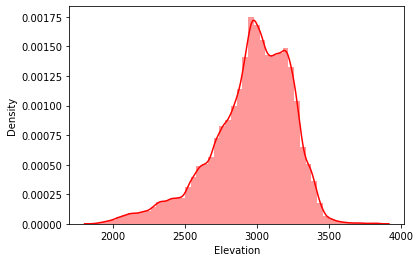

In [7]:
sns.distplot(df['Elevation'] , color = 'red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


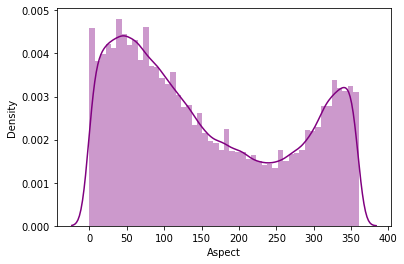

In [8]:
sns.distplot(df['Aspect'] , color = 'purple')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


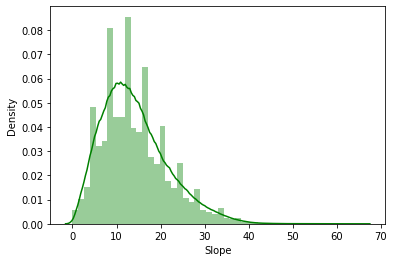

In [9]:
sns.distplot(df['Slope'] , color = 'green')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


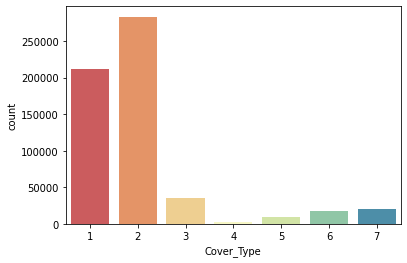

In [10]:
sns.countplot(df['Cover_Type'] , palette = 'Spectral')

In [11]:
X = df.drop(['Cover_Type'] , axis = 1)
y = df['Cover_Type']

print(X.shape)
print(y.shape)

(581012, 54)
(581012,)


In [12]:
#define a function to plot the dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ms")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [13]:
def plot_predictions(clf, axes):
    #create data in continous linear space
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state=42)

In [15]:
X_train_scale = preprocessing.scale(X_train)
X_valid_scale = preprocessing.scale(X_test)

In [ ]:
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge")) #hinge applies Stochastic Gradient Descent
))

#call the pipeline
polynomial_svm_clf.fit(X_train_scale,y_train)


# y_train_pred = cross_val_predict(polynomial_svm_clf, X_train_scale, y_test, cv=5)
svm_prediction = polynomial_svm_clf.predict(X_train_scale)
svm_acc_score_train = accuracy_score(y_train, svm_prediction)
svm_prediction = polynomial_svm_clf.predict(X_valid_scale)
svm_acc_score_valid = accuracy_score(y_test, svm_prediction)
print("Train accuracy = {0}, Test accuracy = {1}".format(svm_acc_score_train, svm_acc_score_valid))

In [ ]:
print(confusion_matrix(y_test,svm_prediction))
print(classification_report(y_test,svm_prediction))

In [ ]:
plt.figure(figsize=(11, 4))

#plot the decision boundaries
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])

#plot the dataset
plot_dataset(X_train_scale, y_train, [-1.5, 2.5, -1, 1.5])

plt.title(r"$d=3, C=10$", fontsize=18)
plt.show()

In [ ]:
polynomial_svm_kernel_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scalar", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5)) 
))

#call the pipeline
polynomial_svm_kernel_clf.fit(X_train_scale,y_train)

svm_kernel_prediction = polynomial_svm_kernel_clf.predict(X_train_scale)
svm_kernel_acc_score_train = accuracy_score(y_train, svm_kernel_prediction)
svm_kernel_prediction = polynomial_svm_kernel_clf.predict(X_valid_scale)
svm_kernel_acc_score_valid = accuracy_score(y_test, svm_kernel_prediction)
print("Train accuracy = {0}, Test accuracy = {1}".format(svm_kernel_acc_score_train, svm_kernel_acc_score_valid))

In [ ]:
print(confusion_matrix(y_test,svm_kernel_prediction))
print(classification_report(y_test,svm_kernel_prediction))

In [ ]:
plt.figure(figsize=(11, 4))

#plot the decision boundaries
plot_predictions(polynomial_svm_kernel_clf, [-1.5, 2.5, -1, 1.5])

#plot the dataset
plot_dataset(X_train_scale, y_train, [-1.5, 2.5, -1, 1.5])

plt.title(r"$d=3, C=10$", fontsize=18)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [ ]:
print(X.shape)

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

# Conclusions

Summarize your work here. 
Which classifier do you think the best? 
Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

# References